In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Iris dataset
df = pd.read_csv("../data/iris.data")

# Get the features
X = df.iloc[:, [2, 3]].values

# Get the labels
y = df.iloc[:, 4].values

# Convert the labels to numbers
y = np.where(y == 'Iris-setosa', 1, np.where(y == 'Iris-versicolor', 2, 3))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize the features
sc = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_std = sc.fit_transform(X_train)

# Transform the test data
X_test_std = sc.transform(X_test)

# Combine the standardized training and test data
X_combined_std = np.vstack((X_train_std, X_test_std))

# Combine training and test data
X_combined = np.vstack((X_train, X_test))

# Combine the lables
y_combined = np.hstack((y_train, y_test))

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):
    # setup marker generator y color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plotear la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # graficar los ejemplos de cada clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}',
                    edgecolor='black')
    
    # resaltar muestras de test si test_idx está definido
    if test_idx is not None:
        # Extraemos las muestras de test
        X_test, y_test = X[test_idx, :], y[test_idx]
        # Se pueden graficar con un contorno o un marcador distinto
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black',
                    alpha=1.0, linewidth=1.5, marker='o',
                    s=100, label='Test set')

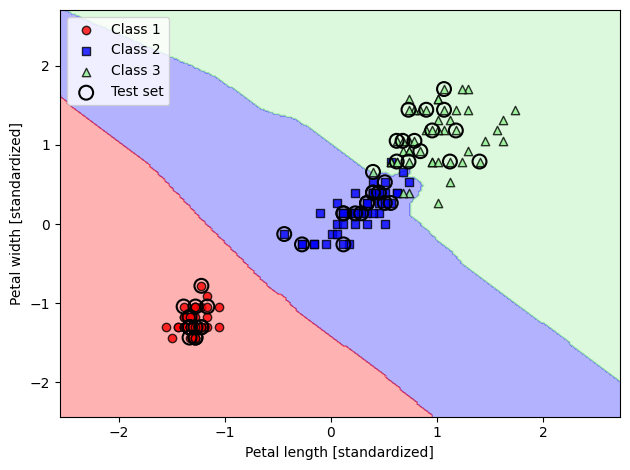

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()